## Reuters dataset

### References
- [Francois Chollet on Keras](https://blog.keras.io/author/francois-chollet.html)
- [Andrew Ng's CS 230 Deep Learning Course at Stanford](http://cs230.stanford.edu/)
- [Free Deep Learning Book by Ian Goodfellow et. al.](https://github.com/janishar/mit-deep-learning-book-pdf)

### Introduction
Here, we give the code for the Reuters dataset example that was run during the talk. Note that this example comes from **Francois Chollet** (creator of Keras)

Please read about the dataset before you begin
- [About the Reuters dataset](https://martin-thoma.com/nlp-reuters/)
- [Splitting your data into Test, Train and Validation sets from Andrew Ng's Machine Learning Yearning (free book)](https://www.mlyearning.org/)

In [2]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [3]:
len(train_data)

8982

In [4]:
len(test_data)

2246

In [5]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [6]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
    train_data[0]])
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [7]:
train_labels[10]

3

In [8]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


In [9]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)


In [10]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

| Problem type | Activation | Loss | Metric |
| --- | --- | --- |--- |
|Binary classification |	sigmoid	| binary_crossentropy | accuracy |
|Multiclass single-label classification	| softmax	| categorical_crossentropy |accuracy |
|Multiclass multilabel classification	| sigmoid	| binary_crossentropy |accuracy |
|Regression to arbitrary values	 | None |	MSE | MAE, $R^2$ |
|Regression to values between 0 and 1|	sigmoid |	MSE, binary_crossentropy | MAE |

In [11]:
# As this is a multi-class, multi-label classification problem, we will set the parameters to the Keras
# functions as suggested by the table above

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [13]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 159us/step - loss: 2.5241 - acc: 0.4977 - val_loss: 1.7183 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 1s 100us/step - loss: 1.4443 - acc: 0.6889 - val_loss: 1.3496 - val_acc: 0.7090
Epoch 3/20
7982/7982 [==============================] - 1s 96us/step - loss: 1.0993 - acc: 0.7641 - val_loss: 1.1745 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 1s 96us/step - loss: 0.8729 - acc: 0.8157 - val_loss: 1.0842 - val_acc: 0.7580
Epoch 5/20
7982/7982 [==============================] - 1s 97us/step - loss: 0.7061 - acc: 0.8492 - val_loss: 0.9869 - val_acc: 0.7830
Epoch 6/20
7982/7982 [==============================] - 1s 96us/step - loss: 0.5696 - acc: 0.8790 - val_loss: 0.9418 - val_acc: 0.8040
Epoch 7/20
7982/7982 [==============================] - 1s 96us/step - loss: 0.4626 - acc: 0.9034 - val_loss: 0.9092 - val_acc: 0.8030
Epoch

In [14]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

<Figure size 640x480 with 1 Axes>

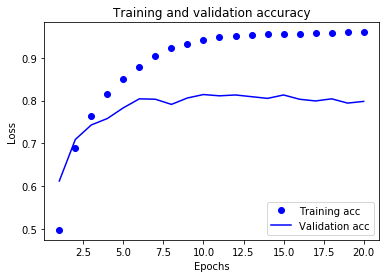

In [15]:
plt.clf()

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [16]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 133us/step - loss: 2.5398 - acc: 0.5226 - val_loss: 1.6733 - val_acc: 0.6570
Epoch 2/9
7982/7982 [==============================] - 1s 96us/step - loss: 1.3712 - acc: 0.7121 - val_loss: 1.2758 - val_acc: 0.7210
Epoch 3/9
7982/7982 [==============================] - 1s 97us/step - loss: 1.0136 - acc: 0.7781 - val_loss: 1.1303 - val_acc: 0.7530
Epoch 4/9
7982/7982 [==============================] - 1s 98us/step - loss: 0.7975 - acc: 0.8251 - val_loss: 1.0538 - val_acc: 0.7590
Epoch 5/9
7982/7982 [==============================] - 1s 97us/step - loss: 0.6393 - acc: 0.8626 - val_loss: 0.9755 - val_acc: 0.7930
Epoch 6/9
7982/7982 [==============================] - 1s 96us/step - loss: 0.5124 - acc: 0.8921 - val_loss: 0.9101 - val_acc: 0.8120
Epoch 7/9
7982/7982 [==============================] - 1s 96us/step - loss: 0.4123 - acc: 0.9139 - val_loss: 0.8918 - val_acc: 0.8210
Epoch 8/9
798

In [17]:
results

[1.0232355049011013, 0.774265360694216]

In [18]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)


0.182546749777382

In [19]:
predictions = model.predict(x_test)

In [20]:
predictions

array([[1.0811825e-05, 8.4176201e-05, 2.7465627e-05, ..., 3.4177188e-05,
        6.7276223e-06, 9.8269438e-06],
       [6.6120643e-04, 1.4942277e-02, 3.2245580e-03, ..., 5.4573029e-04,
        1.2166760e-05, 2.4812011e-04],
       [1.7403334e-03, 7.6691538e-01, 2.8824306e-03, ..., 1.5262903e-04,
        2.0600823e-03, 2.2949287e-04],
       ...,
       [1.1206262e-05, 2.1467711e-04, 4.1062598e-05, ..., 8.8538991e-06,
        1.1545641e-04, 1.1413311e-05],
       [1.3021611e-03, 1.1818657e-01, 3.3842605e-03, ..., 6.0161063e-04,
        7.2012987e-04, 3.7059319e-04],
       [8.6718169e-04, 5.4358089e-01, 1.9575630e-03, ..., 5.3245374e-05,
        5.1319803e-04, 2.0590516e-04]], dtype=float32)

In [21]:
np.sum(predictions[0])

1.0

In [22]:
np.argmax(predictions[0])

3

In [23]:
predictions[0]

array([1.08118247e-05, 8.41762012e-05, 2.74656268e-05, 9.71144438e-01,
       1.66540369e-02, 1.27977572e-07, 1.03619401e-04, 3.19867286e-05,
       3.72076267e-03, 2.32919638e-06, 3.32698146e-05, 1.64173055e-03,
       5.68466348e-05, 2.83784520e-05, 5.16473483e-06, 1.97407207e-05,
       9.43936117e-04, 2.08104582e-04, 3.04924877e-04, 1.25083001e-03,
       8.07483331e-04, 5.31660509e-04, 7.63041317e-06, 5.89251867e-05,
       1.28023976e-05, 3.25452886e-04, 2.72049760e-06, 2.93568955e-05,
       8.49071876e-06, 1.09094908e-04, 3.55913973e-04, 1.92846157e-04,
       1.21998455e-05, 4.29482898e-05, 3.68015426e-05, 2.26427783e-05,
       1.74379384e-04, 4.67668760e-05, 9.55718933e-05, 2.91190954e-04,
       3.91010581e-05, 4.70473606e-04, 2.15053569e-06, 3.41771884e-05,
       6.72762235e-06, 9.82694382e-06], dtype=float32)